# Check the Spire Output

In [1]:
%load_ext autoreload
%autoreload 2

from pygeodyn.PYGEODYN import Pygeodyn
from gc import collect as gc_collect

# ## Initialization timeperiod
# startdate = "2018-11-01"
# enddate   = "2018-11-29"
# ### Satellites:
Sat_List = ['spire083']

## Stage 1- EXAT and PCE/Raw ICs

In [2]:
# %load_ext autoreload
# %autoreload 2

# from pygeodyn.PYGEODYN import Pygeodyn
# from gc import collect as gc_collect

# startdate = "2018-11-01"
# enddate   = "2018-11-30"  #24

# for sat in Sat_List:

#     settings_SPIRE_pce= {# Basic input settings
#                  'satellite'      : {'input': sat},
#                  'den_model'      : {'input': 'jb2008'},
#                  'run_type'       : {'input': 'DataReduction_PCE'},
#                  'run_specifier'  : {'input': '_test_infrastruc'},
#                  'cd_model'       : {'input': 'BWDRAG'},
#                  'file_string'    : {'input': 'CD_2p3'},
#                # Force Model settings
#                   'cd_type'               : {'input':"Fixed_CD"},
#                   'cd_value'              : {'input':2.300000},
#                   'scaling_factor'        : {'input':False},
#                   'cd_adjustment_boolean' : {'input':False },
#                   'hours_between_cd_adj'  : {'input':6 },
#                # Run
#                   'step'           : {'input': 60.},
#                   'orbfil_step'    : {'input': 120.},    
#                   #
#                   'arc'    : {'input':["2018.324"]},
#                   'epoch_start'    : {'input':["2018-11-20 00:00:00"]},
#                   'epoch_stop'     : {'input':["2018-11-21 00:00:00"]},
#                   #                  
#                   'global_options': {'input':'pso_2018'},
#                # Request read on raw outputs
#                   'request_data'   : {'input': ['Trajectory_orbfil',
#                                                 'Density',
#                                                 'DragFile',
#                                                 'Residuals_summary',
#                                                ]},
#               #end dict
#               }




#     sat = Pygeodyn(settings_SPIRE_pce, use_file=False)
#     sat.initialize_timeperiod_stage1(startdate, enddate,
#                                       overwrite_exat=True, 
#                                       overwrite_g2b=True  )
#     sat = 0
    
    

# import sys
# sys.exit(0)

## Stage 2: Setup files + Raw ICs and Update ICs

At this stage, the external attitude and G2B files for the time period of interest should be constructed for each satellite.

Check that the g2b and raw initial conditions are named according the the constructed files.

### Find earliest daily start time to match data

Use the earliest instance of data in a day as the starting epoch/IC and set the end epoch to midnight

In [3]:
# raw_satinput={}
# prms        ={}
# raw_satinput['ephem_path']    = '/data/SatDragModelValidation/data/inputs/sat_spire083/g2b/'\
#                                 + 'Spire083_RawEphem_20181107_20181111.txt'
# #                               + 'Spire083_RawEphem_20181101_20181130.txt'


# raw_satinput['ephem_path_dir']='/data/SatDragModelValidation/data/inputs/raw_inputdata/data_Spire/arcs'
# prms['epoch_start'] = ['2018-11-07 00:23:35','2018-11-08 00:00:00']
# # prms['epoch_start'] = 

# ###  Load inital conditions file
# xyzline = pd.read_csv(raw_satinput['ephem_path'], 
#             skiprows =23, 
#             # nrows=line_no_list[-1]- line_no_list[0],           
#             sep = '\s+',
#             dtype=object,
#             names = [
#                 'DateYMD',
#                 'DateHMS',
#                 'X',
#                 'Y',
#                 'Z',
#                 'X_dot',
#                 'Y_dot',
#                 'Z_dot',
#                     ],)
# #
# xyzline['Date'] =  pd.to_datetime(\
#                             xyzline['DateYMD']  \
#                         + xyzline['DateHMS'], \
#                             format='%Y-%m-%d%H:%M:%S')
# del xyzline['DateYMD'], xyzline['DateHMS']

# startdate = pd.to_datetime(prms['epoch_start'][0])
# enddate   = pd.to_datetime(prms['epoch_start'][-1])



# xyzline = xyzline.query(f"{startdate.year}{startdate.month:02d}{startdate.day:02d}"\
#                      +f" < Date < "\
#                      +f"{enddate.year}{enddate.month:02d}{enddate.day+1:02d}")
    
# xyzline =  xyzline.reset_index(drop=True)


In [4]:
# import plotly.graph_objects as go
# from plotly.offline import plot, iplot
# from plotly.subplots import make_subplots
# import plotly.express as px

# config = dict({
#                 'displayModeBar': True,
#                 'responsive': True,
#                 'staticPlot': False,
#                 'displaylogo': False,
#                 'showTips': False,
#                 })

# # Simplify Plotting Schemes:
# col_x =  "#1f77b4"  # 'tab:blue'
# col_y =  "#ff7f0e"  # 'tab:orange'
# col_z =  "#2ca02c"  # 'tab:green'
# # col_qw =  "#9467bd"  # 'tab:purple'

# fig = make_subplots(rows=1, cols=1)



# fig.add_trace(go.Scattergl(
#             x=xyzline['Date'],
#             y=xyzline['X'].values.astype(float),
#             name=f"X",
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color=col_x),
#                 showlegend=True),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=xyzline['Date'],
#             y=xyzline['Y'].values.astype(float),
#             name=f"Y",
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color=col_y),
#                 showlegend=True),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=xyzline['Date'],
#             y=xyzline['Z'].values.astype(float),
#             name=f"Z",
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color=col_z),     
#                 showlegend=True),
#                 secondary_y=False, row=1, col=1,)


# fig.update_yaxes( title="m",  exponentformat= 'power',row=1, col=1)
# fig.update_yaxes( title="m",  exponentformat= 'power',row=2, col=1)
# fig.update_yaxes( title="m",  exponentformat= 'power',row=3, col=1)


# fig.update_layout(width=900,height=600,
#                 )
# fig.show(config=config)


In [5]:
# xyzline['Date'][900]

In [6]:
# from  datetime import datetime, timedelta
import pandas as pd
import numpy  as np
import linecache


def get_dates(test_timeperiod, file_raw_ICs):

    start_0ut = []
    end___0ut = []
    arcs = []
    start_update = []
    #
    dt_1days = pd.to_timedelta(24, 'h') 
    #


    startdate = pd.to_datetime(test_timeperiod[0])
    enddate   = pd.to_datetime(test_timeperiod[-1])
    startdate_dt = pd.to_datetime(startdate, format='%Y-%m-%d')
    enddate_dt   = pd.to_datetime(enddate,   format='%Y-%m-%d')
    starts_linspace_dt = pd.date_range(start=startdate_dt ,
                                         end=enddate_dt   ,
                                        freq=str(1)+"D")

    ### Make a list of the initial conditions for daily epoch start times that match
    ### the first instance of pce data for that day
    for iday, day in enumerate(starts_linspace_dt):

        epoch_start =  f"{day.strftime('%Y-%m-%d %H:%M:%S')}" #f"2018-11-{dayval:02d} 00:00:00"
        print(epoch_start)
        epoch_startDT = pd.to_datetime(epoch_start,format='%Y-%m-%d %H:%M:%S')



        datetype = 'datetime_string'
        date_in_file_flag = False

        # Only need to use accuracy to within 1 second (ignore the microseconds in the file)

        date_str = str(epoch_startDT)

        with open(file_raw_ICs, 'r') as f:
            for line_no, line_text in enumerate(f):
                if date_str in line_text:
                    date_in_file_flag = True
                    break
        if date_in_file_flag == False:
            
            # Find the dates that have the same hour
            date_roundhour_str = str(epoch_startDT)[:10]

            # Scan through IC file and append a list of dates within the same hour
            line_no_list = []
            line_list = []
            with open(file_raw_ICs, 'r') as f:
                for line_no, line_text in enumerate(f):
                    if date_roundhour_str in line_text:
                        line_no_list.append(line_no)
            
            
            ### If data does not contains this day, don't append it
            if len(line_no_list) ==0:
                print("** no data for ", date_roundhour_str)
                continue
                
                
            for i in np.arange(line_no_list[0], line_no_list[-1]):
                line = linecache.getline(file_raw_ICs, i)
                line_list.append(line)
            dates = []
            for i, val in enumerate(line_list):
                dates.append(
                    pd.to_datetime(line_list[i][:19],
                                   format='%Y-%m-%d %H:%M:%S'))
            start_update.append(pd.to_datetime(dates[1]))
#             print('dates',dates[0])

            
        
        else:
            #         print('Found date in IC file:', str(epoch_startDT))
            xyzline = pd.read_csv(
                file_raw_ICs,
                skiprows=line_no,
                nrows=1,
                sep='\s+',
                dtype=str,
                names=[
                    'DateYMD',
                    'DateHMS',
                    'X',
                    'Y',
                    'Z',
                    'X_dot',
                    'Y_dot',
                    'Z_dot',
                ],
            )
            start_update.append(pd.Timestamp(
                pd.to_datetime(xyzline['DateYMD'] + xyzline['DateHMS'],
                               format='%Y-%m-%d%H:%M:%S').values[0]))

#         print(epoch_start[:10], "earliest time is:",
#               start_update[iday])

        print("---appending dates for ", day)
        start_0ut.append(f"{day.strftime('%Y-%m-%d')} 00:00:00")#f"2018-11-{dayval:02d} 00:00:00")
        end___0ut.append(
            pd.to_datetime(epoch_startDT +
                           dt_1days).strftime('%Y-%m-%d %H:%M:%S'))
        arcs.append(epoch_startDT.strftime('%Y.%j'))

#     del date_roundhour_str
#     del line_no_list
#     del line_list
#     del dates
#     del xyzline

    start_update = [pd.to_datetime(idate).strftime('%Y-%m-%d %H:%M:%S') \
                    for idate in start_update]
#     start_update = [pd.to_datetime(idate).strftime('%Y-%m-%d %H:%M:%S') \
#                     for idate in start_update]
    
    return(start_0ut,end___0ut,arcs,start_update)

In [7]:
# idate

# Sat_List = ['spire083', 'spire084', 'spire085']  
test_timeperiod = ["2018-11-09 00:00:00", "2018-11-14 00:00:00"]  # 4 days
file_raw_ICs = f"/data/SatDragModelValidation/data/inputs/"\
              +f"sat_spire{83:03d}/g2b/Spire{83:03d}_RawEphem_20181101_20181130.txt"

start_0ut, end___0ut, arcs, start_update = get_dates(test_timeperiod, file_raw_ICs)
print()
# print("start_0ut",start_0ut )
print("arcs",arcs,'\n' )
print("start_update",start_update ,'\n')
print("end___0ut",end___0ut ,'\n')

# print()

2018-11-09 00:00:00
---appending dates for  2018-11-09 00:00:00
2018-11-10 00:00:00
---appending dates for  2018-11-10 00:00:00
2018-11-11 00:00:00
---appending dates for  2018-11-11 00:00:00
2018-11-12 00:00:00
---appending dates for  2018-11-12 00:00:00
2018-11-13 00:00:00
---appending dates for  2018-11-13 00:00:00
2018-11-14 00:00:00
---appending dates for  2018-11-14 00:00:00

arcs ['2018.313', '2018.314', '2018.315', '2018.316', '2018.317', '2018.318'] 

start_update ['2018-11-09 00:04:59', '2018-11-10 00:00:00', '2018-11-11 00:00:00', '2018-11-12 00:00:00', '2018-11-13 00:00:00', '2018-11-14 00:00:00'] 

end___0ut ['2018-11-10 00:00:00', '2018-11-11 00:00:00', '2018-11-12 00:00:00', '2018-11-13 00:00:00', '2018-11-14 00:00:00', '2018-11-15 00:00:00'] 



In [8]:
run_list = ['jb2008', #'msis2','dtm2020_o',
#             'hasdm_oc', 'ctipe_oc', 'gitm'
#     'tiegcm_oc',
           ]
dir_modeldat='/data/SatDragModelValidation/data/inputs/atmos_models'
run_dict={}
for i in run_list:
    if i =='msis2':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 1.236791
        run_dict[i]['num'] = 5
        run_dict[i]['model_path'] = None

    if i =='dtm2020_o':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 3.351462
        run_dict[i]['num'] = 3
        run_dict[i]['model_path'] = None

    if i =='jb2008':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 1.908777
        run_dict[i]['num'] = 1
        run_dict[i]['model_path'] = None

    ### PHYSICAL MODELS
    if i =='tiegcm_oc':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 1.372949
        run_dict[i]['num'] = 0
        run_dict[i]['model_path'] = dir_modeldat+'/tiegcm/icesat2_oct2018_jan2019'
    if i =='hasdm_oc':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 2.076144
        run_dict[i]['num'] = 2
        run_dict[i]['model_path'] = dir_modeldat+'/hasdm/icesat2_oct2018_jan2019'
    if i =='ctipe_oc':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 4.368334
        run_dict[i]['num']=4
        run_dict[i]['model_path'] = dir_modeldat+'/ctipe/icesat2_oct2018_jan2019'
    if i =='gitm':
        run_dict[i]={}
        #run_dict[i]['cd_avg']  = 3.063949
        run_dict[i]['num']=4
        run_dict[i]['model_path'] = dir_modeldat+'/gitm/icesat2_oct2018_jan2019'


print(run_dict)

{'jb2008': {'num': 1, 'model_path': None}}


In [9]:
for i,den in enumerate(run_list):
    print(run_dict[den])

{'num': 1, 'model_path': None}


In [10]:
%load_ext autoreload
%autoreload 2
from pygeodyn.PYGEODYN import Pygeodyn
from gc import collect as gc_collect


obj = {}
for i,den in enumerate(run_list):
    satval = 'spire083'

    satnum = int(satval[5:])

    file_raw_ICs = f"/data/SatDragModelValidation/data/inputs/"\
              +f"sat_spire{satnum:03d}/g2b/Spire{satnum:03d}_RawEphem_20181101_20181130.txt"

#     start_0ut, end___0ut, arcs, start_update = get_dates(test_timeperiod, file_raw_ICs)

    ### Run GEODYN with earliest start time to midnight
    ###      Runnning GEODYN in this configuration, with the rawephem file as the IC 
#     print()
#     print("start_0ut",start_0ut )
#     print("end___0ut",end___0ut )
#     print("arcs",arcs )
#     print("start_update",start_update )
#     print()


    settings_SPIRE= {# Basic input settings
                     'satellite'      : {'input': f'spire{satnum:03d}'},
                     'den_model'      : {'input': den},
                     'run_type'       : {'input': 'DataReduction_PCE'},
                     'run_specifier'  : {'input': '_updateICs_1'},
                     'cd_model'       : {'input': 'BWDRAG'},
                     'file_string'    : {'input': 'CD_2p3'},
                     # Force Model settings
                      'cd_type'               : {'input':"Fixed_CD"},
                      'cd_value'              : {'input':2.300000},
                      'scaling_factor'        : {'input':False},
                      'cd_adjustment_boolean' : {'input':False },
                      'hours_between_cd_adj'  : {'input':6 },
                     # Run
                      'step'           : {'input': 60.},
                      'orbfil_step'    : {'input': 120.},
                      'which_ICfile'   : {'input':file_raw_ICs},
                       #
#                       'arc'            : {'input':['2018.313']},
#                       'epoch_start'    : {'input': ['2018-11-09 00:04:59']},#start_update},
#                        #   
#                       'epoch_stop'     : {'input':['2018-11-10 00:00:00']},  
                  'arc'            : {'input':arcs
#                                                 [
#                                                '2018.313',
#                                                '2018.314',
#                                                '2018.315',
#                                                '2018.316',
#                                                '2018.317',
#                                                '2018.318',
#                                                '2018.319',
#                                                '2018.320',
#                                                '2018.321',
#                                                '2018.322',
#                                                '2018.323',
#                                                '2018.324',
#                                                '2018.325',
#                                                '2018.326',
#                                               ],
                                                 },
                  'epoch_start'    : {'input': start_update,
#                                                   [
#                                                 '2018-11-09 00:00:00',
#                                                 '2018-11-10 00:00:00',
#                                                 '2018-11-11 00:00:00',
#                                                 '2018-11-12 00:00:00',
#                                                 '2018-11-13 00:00:00',
#                                                 '2018-11-14 00:00:00',
#                                                 '2018-11-15 00:00:00',
#                                                 '2018-11-16 00:00:00',
#                                                 '2018-11-17 00:00:00',
#                                                 '2018-11-18 00:00:00',
#                                                 '2018-11-19 00:00:00',
#                                                 '2018-11-20 00:00:00',
#                                                 '2018-11-21 00:00:00',
#                                                 '2018-11-22 00:00:00',
#                                                ],
                                      },
                   #
                  'epoch_stop'     : {'input':end___0ut,
#                                               [ 
#                                                 '2018-11-10 00:00:00',
#                                                 '2018-11-11 00:00:00',
#                                                 '2018-11-12 00:00:00',
#                                                 '2018-11-13 00:00:00',
#                                                 '2018-11-14 00:00:00',
#                                                 '2018-11-15 00:00:00',
#                                                 '2018-11-16 00:00:00',
#                                                 '2018-11-17 00:00:00',
#                                                 '2018-11-18 00:00:00',
#                                                 '2018-11-19 00:00:00',
#                                                 '2018-11-20 00:00:00',
#                                                 '2018-11-21 00:00:00',
#                                                 '2018-11-22 00:00:00',
#                                                 '2018-11-23 00:00:00',
#                                                 ],
                                            },  
                   #        
#                       'initial_conditions':{'input':[[-5946086.52376,
#                                                       -2058609.41369,
#                                                       2733586.04448 ,
#                                                       -442.77389      ,
#                                                       -5602.37023      ,
#                                                       -5151.33699]]},
                       #
                      'global_options' : {'input':'pso_2018'},
                     # Request read on raw outputs
                      'request_data'   : {'input': ['Trajectory_orbfil', 
                                                   'Density', 
                                                   'Residuals_summary',
                                                   'RunSummary',
                                                   'DragFile',
                                                   ]},
                  #end dict
                  }
    sat = Pygeodyn(settings_SPIRE, use_file=False)
#     sat.run_arcs()
#     obj[satval] = sat.getData()
    obj[den] =  sat.getData_BigData_lowmemory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
spire083
check sat Spire
  - convergence achieved
Arc:  2018.313.01
  - convergence achieved
Arc:  2018.314.01
  - convergence achieved
Arc:  2018.315.01
  - convergence achieved
Arc:  2018.316.01
  - convergence achieved
Arc:  2018.317.01
  - convergence achieved
Arc:  2018.318.01
No matching lastline time:  2018-11-15 00:00:00 435597


In [11]:
# obj[satval].__dict__.keys()

In [12]:
import pandas as pd
import numpy as np
import os

import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio   ### Allows you to save plotly figs


# import pandas as pd
import datetime
# import numpy as np

config = dict({
                'displayModeBar': False,
                'responsive': False,
                'staticPlot': True,
                'displaylogo': False,
                'showTips': False,
                })



def get_color(colorscale_name, loc):
    from _plotly_utils.basevalidators import ColorscaleValidator
    # first parameter: Name of the property being validated
    # second parameter: a string, doesn't really matter in our use case
    cv = ColorscaleValidator("colorscale", "")
    # colorscale will be a list of lists: [[loc1, "rgb1"], [loc2, "rgb2"], ...] 
    colorscale = cv.validate_coerce(colorscale_name)
    
    if hasattr(loc, "__iter__"):
        return [get_continuous_color(colorscale, x) for x in loc]
    return get_continuous_color(colorscale, loc)
        

# Identical to Adam's answer
import plotly.colors
from PIL import ImageColor
def get_continuous_color(colorscale, intermed):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    hex_to_rgb = lambda c: "rgb" + str(ImageColor.getcolor(c, "RGB"))

    if intermed <= 0 or len(colorscale) == 1:
        c = colorscale[0][1]
        return c if c[0] != "#" else hex_to_rgb(c)
    if intermed >= 1:
        c = colorscale[-1][1]
        return c if c[0] != "#" else hex_to_rgb(c)

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    if (low_color[0] == "#") or (high_color[0] == "#"):
        # some color scale names (such as cividis) returns:
        # [[loc1, "hex1"], [loc2, "hex2"], ...]
        low_color = hex_to_rgb(low_color)
        high_color = hex_to_rgb(high_color)

    return plotly.colors.find_intermediate_color(
        lowcolor=low_color,
        highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb",
    )




cols = get_color("Viridis", np.linspace(0, 1, 5))
map_cols = np.linspace(0, 1, 5)
colorscale=[]
for i,val in enumerate(map_cols):
    colorscale.append([val, cols[i]])
    



# Simplify Plotting Schemes:
col1 =  px.colors.qualitative.Plotly[2]
col2 =  px.colors.qualitative.Plotly[4]
col3 =  px.colors.qualitative.Plotly[1]
col4 =  px.colors.qualitative.Plotly[3]
col5 =  px.colors.qualitative.Plotly[4]
col6 =  px.colors.qualitative.Plotly[5]



# Simplify Plotting Schemes:
col_msis2     =  "#2ca02c"
col_jb2008    =  "#ff7f0e"
col_dtm2020   =  "#d62728"
col_tiegcm_oc =  "#17becf"
col_hasdm_oc  =  "#1f77b4"
col_ctipe_oc  =  "#9467bd"

x_annot_val = 1.1

font_dict=dict(family='Arial',size=14,color='black')
font_annot=dict(family='Arial',size=13,color='black')


def get_plot_params(plot_num, model_name_string):
    '''
    INPUT:   
        Plot number, model_name string, x_annot_val
    
    RETURN:
        col, x_annot, y_annot1, y_annot2, m_size,   
    '''
    if model_name_string == 'msis2':
        col=col_msis2
    elif model_name_string == 'dtm2020_o':
        col=col_dtm2020
    elif model_name_string == 'jb2008':
        col=col_jb2008
    elif model_name_string == 'tiegcm_oc':
        col=col_tiegcm_oc
    elif model_name_string == 'hasdm_oc':
        col=col_hasdm_oc
    elif model_name_string == 'ctipe_oc':
        col=col_ctipe_oc
        
    ### Old Models
    elif model_name_string == 'dtm87':
        col='grey'
    elif model_name_string == 'jaachia71':
        col='grey'
    elif model_name_string == 'msis86':
        col='grey'
    elif model_name_string == 'msis00':
        col='tan'
        
    return(col)

from pygeodyn.PYGEODYN import Pygeodyn
from pygeodyn.pygeodyn_plot import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


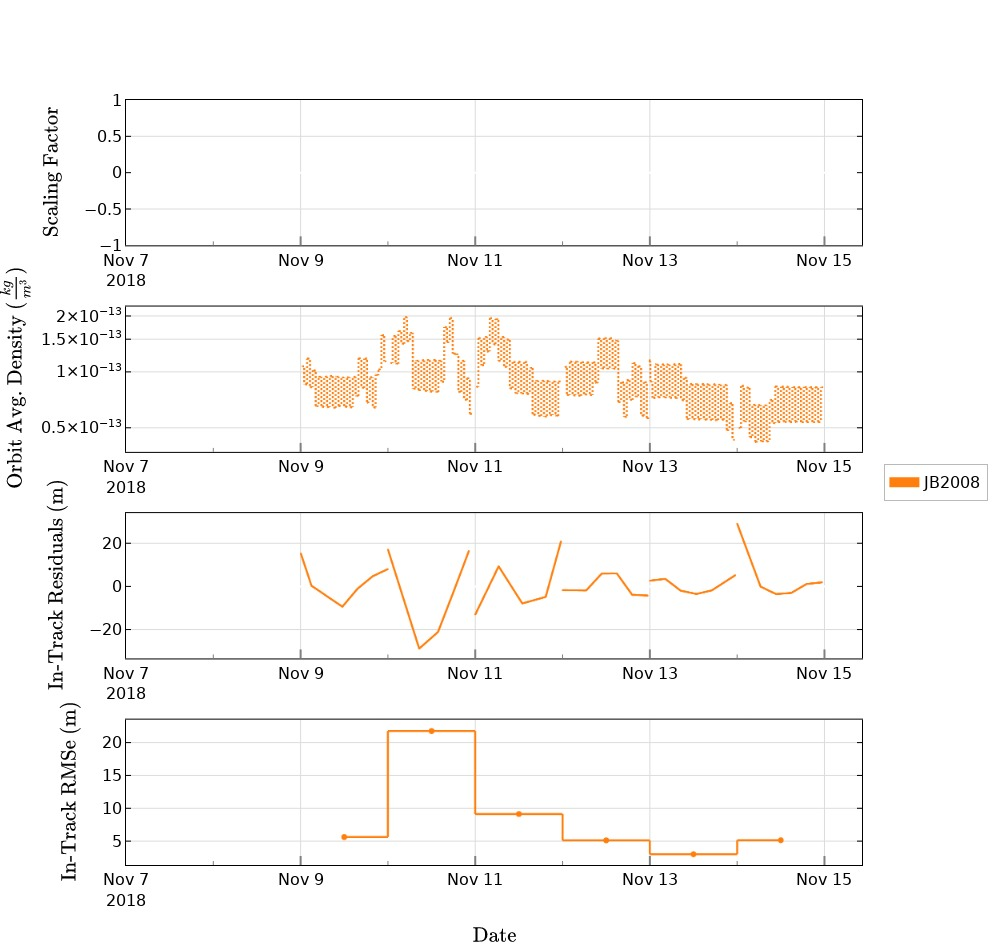

In [13]:
%load_ext autoreload
%autoreload 2


def plot_all_nokp(fig, obj_m1, model_dict ):

    cd_apriori  = 2.5

    ####  Get plot Parameters for this model
    model_m1 = obj_m1.__dict__['global_params']['prms']['den_model']
    col = get_plot_params(model_dict['num'], model_m1)
    dateplot = []
    rms_totals = []

#     fig.add_trace(go.Scattergl(x=model_dict['ScalingFactor_times'],
#                            y=model_dict['ScalingFactors'],
#                            name= model,
#                            mode='markers+lines',
#                            opacity=0.8,
#                                marker=dict(color=col, size=6 ),
#                            line = dict(shape = 'hvh', color = col, width=2),
#                            showlegend=False),
#                            secondary_y=False,row=1, col=1)

    
    for ii,arc in enumerate(obj_m1.__dict__['global_params']['arc_input']):
        arc =arc+'.01'
        dateplot.append(pd.to_datetime(datetime.datetime(int(arc.split('.')[0]), 1, 1) \
                                     + datetime.timedelta(int(arc.split('.')[1]))      \
                                     - datetime.timedelta(hours=12) ))
        rms_totals.append(obj_m1.__dict__['Statistics'][arc]['T_RMS'].values[0])

        ### -----------------------------------------------------------------------------------------------------
        ###     DENSITY
        ###
        time_avg,d_avg, d_avg_rolling = orb_avg(obj_m1.Density, arc)

#         print('scaling factor',model_dict['ScalingFactors'][ii])
        

        
        ### -----------------------------------------------------------------------------------------------------
        ###     Orbit Averaged Density
#         fig.add_trace(go.Scattergl(x=time_avg,
#                                    y=d_avg*(model_dict['ScalingFactors'][ii]),
#                                    ### name= model_m1,
#                                    mode='markers+lines',
#                                    opacity=1,
#                                        marker=dict(color=col,size=2),
#                                    ###     line = dict( color = col, width=2),
# #                                                    line = dict(shape='hvh', dash ='solid', color = col, width=2),
#                                        line = dict(dash ='solid', color = col, width=2),
#                                    showlegend=False), row=2, col=1)
        fig.add_trace(go.Scattergl(x=time_avg,
                               y=d_avg,
                               ### name= model_m1,
                               mode='markers+lines',
                               opacity=1,
                                   marker=dict(color=col,size=2),
#                                                line = dict( color = col, width=2),
                                   line = dict(shape='hvh', dash ='dot', color = col, width=2),
                               showlegend=False), row=2, col=1)            
#                 fig.add_trace(go.Scattergl(x=obj_m1.__dict__['Density'][arc]['Date'][::50],
#                                            y=obj_m1.__dict__['Density'][arc]['rho (kg/m**3)'][::50],
#                                            ### name= model_m1,
#                                            mode='lines',
#                                            opacity=0.2,
#                                                marker=dict(color=col,size=2),
#                                            ###     line = dict( color = col, width=2),
#                                                line = dict(dash ='solid', color = col, width=2),
#                                            showlegend=False), row=2, col=1)

        ### -----------------------------------------------------------------------------------------------------
        ###     In Track Residuals
        data_resids = obj_m1.__dict__['OrbitResids'][arc]['resids']
        fig.add_trace(go.Scattergl(x=data_resids['Date'][::50],
                                   y=data_resids['T'][::50],
                                   ###   name= model_m1,
                                     mode='markers+lines',
                                     opacity=1,
                                         marker=dict(color=col,size=2),
                                         line = dict( color = col, width=2),
                                     showlegend=False),
                                     secondary_y=False, row=3, col=1)
        ### -----------------------------------------------------------------------------------------------------
        ###     TOTAL RMS
#             print(rms_totals)
        if ii == 14:
#                     print(model_m1, "mean rms_totals:         ",np.round(np.mean(rms_totals),3) )
#                     print('       density scaling factor: ', np.round((cd_adjusted/cd_apriori),3))
            print(model_m1 )
            print("   mean rms_totals:       ",np.round(np.mean(rms_totals),3) )
#             print('   density scaling factor:', np.round((cd_adjusted/cd_apriori),3))
        fig.add_trace(go.Scattergl(x=dateplot,
                                   y=rms_totals,
                                       ###e= 'NTW '+model_m1,
                                   mode='markers+lines',
                                         opacity=1,
                                         marker=dict(color=col,size=6),
                                         line = dict(shape='hvh', dash ='solid', color = col, width=2),
                                   showlegend=False),row=4, col=1)





# full_fig = fig.full_figure_for_development()

    if model_m1 == 'jb2008':

        fig.update_yaxes( title=r"$\text{Scaling Factor}$",
#                          range=yaxis3_range, 
                 exponentformat= 'power',row=1, col=1)

        ###
        ### DENSITY AXIS
        fig.update_yaxes(title_text=r"$\text{Orbit Avg. Density } (\frac{kg}{m^3})$", 
                         type="log", 
#                          range=yaxis2_range, 
                         exponentformat= 'power',row=2, col=1)
        ###
        ### InTrack Residual Axis
        fig.update_yaxes( title=r"$\text{In-Track Residuals (m)}$",
#                          range=yaxis3_range, 
                         exponentformat= 'power',row=3, col=1)
        ###
        ### RMS AXIS
        fig.update_yaxes( title=r"$\text{In-Track RMSe (m)}$" ,type="linear" , exponentformat= 'power',
#                           range=yaxis4_range, 
                         row=4, col=1)
        ###
        ###  DATE on Final x-Axis only
        fig.update_xaxes(title=r"$\text{Date}$", 
#                          range=[pd.to_datetime( "181108-160000", format='%y%m%d-%H%M%S'),
#                                 pd.to_datetime( "181124-120000", format='%y%m%d-%H%M%S')],
                         row=4, col=1)


    return(fig)





### -----------------------------------------------------------------------------------------------------
### -----------------------------------------------------------------------------------------------------
### -----------------------------------------------------------------------------------------------------
### -----------------------------------------------------------------------------------------------------
### -----------------------------------------------------------------------------------------------------


fig = make_subplots(rows=4, cols=1,
                    #                     
                    specs=[[ {"secondary_y": False} ],
                           [ {"secondary_y": False} ],
                           [ {"secondary_y": False} ],
                           [ {"secondary_y": False} ]],
                    #
                    vertical_spacing = 0.08,
                    shared_xaxes=True)


satid = int(obj['jb2008'].__dict__['global_params']['prms']['sat_ID'])
# for plot_num, model in enumerate(run_list):
#     ScalingFactors  = []
#     ScalingFactor_times = []
#     for iarc,valarc in enumerate(obj[model].__dict__['global_params']['arc_input']):
#         arc = valarc+'.01'
#         iters = int(obj[model].__dict__['run_parameters'+arc]['total_iterations'])
#         for itime in obj[model].__dict__['AdjustedParams'][arc][iters][satid]['0CD'].keys():
#             CURRENT_VALUE = obj[model].__dict__['AdjustedParams'][arc][iters][satid]['0CD'][itime]['CURRENT_VALUE']
#             APRIORI_VALUE = obj[model].__dict__['AdjustedParams'][arc][iters][satid]['0CD'][itime]['APRIORI_VALUE']
#             ScalingFactors.append(CURRENT_VALUE/APRIORI_VALUE)
#             ScalingFactor_times.append(itime)
#     run_dict[model]['ScalingFactor_times'] = ScalingFactor_times
#     run_dict[model]['ScalingFactors']      = ScalingFactors


for model in run_dict.keys():
    fig = plot_all_nokp(fig, obj[model],  run_dict[model] )


#######################################################
font_dict=dict(family='Arial',size=16,color='black')
#######################################################




for i in [1,2,3,4]:
    fig.update_xaxes(### LINE at axis border
                      showline=True,
                      showticklabels=True,
                      linecolor='black',
                      linewidth=1,
                     ### Major ticks
                      ticks='inside',
                      tickfont=font_dict,
                      mirror=True,
                      tickwidth=2,
                      ticklen=9,
                      tickcolor='grey',
                      tick0="2018-11-9" ,
                      dtick=86400000.0*2,    # milliseconds in a day, every 7 days
                      #### Minor Ticks
                       minor=dict(
                         dtick=86400000.0, # milliseconds in a day
                         tickwidth=1,
                         ticklen=4,
                         tickcolor='grey',
                         ticks='inside'),
                      ### GRID
                       gridcolor='gainsboro',
                       gridwidth=1,
                       layer='above traces',
                       tickangle=0,
                       row=i, col=1)
    fig.update_yaxes(showline=True,      # add line at x=0
                         showticklabels=True,
                         linecolor='black',  # line color
                         linewidth=1,        # line size
                     ticks='inside',     # ticks outside axis
                     tickfont=font_dict, # tick label font
                     mirror='allticks',  # add ticks to top/right axes
                     tickwidth=1,      # tick width
                     tickcolor='black',  # tick color
                     gridcolor='gainsboro',
                     gridwidth=1,
                     layer='above traces',
                     row=i, col=1)


modelnames=[]
modelcolors = []
#### LEGEND ####
for model in run_dict.keys():
    if model == 'msis2':
        modelnames.append("MSISe2")
        modelcolors.append(col_msis2)

    elif model == 'dtm2020_o':
        modelnames.append("DTM2020")
        modelcolors.append(col_dtm2020)

    elif model == 'jb2008':
        modelnames.append("JB2008")
        modelcolors.append(col_jb2008)

    elif model == 'tiegcm_oc':
        modelnames.append("TIEGCM")
        modelcolors.append(col_tiegcm_oc)

    elif model == 'hasdm_oc':
        modelnames.append("HASDM")
        modelcolors.append(col_hasdm_oc)

    elif model == 'ctipe_oc':
        modelnames.append("CTIPe")
        modelcolors.append(col_ctipe_oc)

    elif model == 'gitm':
        modelnames.append("GITM")
        modelcolors.append(col_gitm)



df = pd.DataFrame({"starts_colors": modelcolors
                                    })

fig.update_traces(showlegend=False).add_traces(
    [   go.Scattergl(name=modelnames[i], 
               x=[pd.to_datetime( "181107-000000", format='%y%m%d-%H%M%S')],
               mode='lines',
               line = dict(shape = 'hv',  width=10),
               marker_color=c, 
               showlegend=True)
        for i,c in enumerate((df.loc[:,["starts_colors"]].values.ravel()))])

fig.update_layout(legend=dict(
    yanchor="middle",
    y=0.5,
    xanchor="center",
    x=1.1,
#     x=1.015,
        font=font_dict      ,
        bgcolor="white",
        bordercolor="darkgrey",
        borderwidth=0.8,
    )  )

fig.update_layout(
#                   title = '',
                  autosize=False,    width=1000,    height=950,
                  legend= {'itemsizing': 'trace'},
                  font=font_dict,
                  plot_bgcolor='white', 
                 )
fig.update_annotations(font_size=14)  # Increase size of subplot title

fig.show(renderer="jpg",
         config=dict({
            'displayModeBar': False,
            'responsive': False,
            'staticPlot': True,
            'displaylogo': False,
            'showTips': False,
            }))

#     if save_plot_flag:
#         pio.write_image(fig, plot_dir+'Assessment_CDAvgAdj.jpg', scale=3)




In [14]:
# obj[satval].__dict__['global_params']

In [15]:
# obj[satval].__dict__['run_parameters2018.313.01']

In [16]:
# obj[satval].__dict__['OrbitResids']['2018.313.01'].keys()
# obj[satval].__dict__['OrbitResids']['2018.313.01']['data_PCE']
# obj[satval].__dict__['OrbitResids']['2018.313.01']['data_orbfil']

# obj[satval].__dict__.keys()

# obj[satval].__dict__["Statistics"]

In [17]:
# import plotly.graph_objects as go
# from plotly.offline import plot, iplot
# from plotly.subplots import make_subplots
# import plotly.express as px

# config = dict({
#                 'displayModeBar': True,
#                 'responsive': False,
#                 'staticPlot': True,
#                 'displaylogo': False,
#                 'showTips': False,
#                 })


# fig = make_subplots(rows=3, cols=1)


# arc = '2018.313.01'

# orbfit = obj[satval].__dict__['OrbitResids'][arc]['data_orbfil']
# pce = obj[satval].__dict__['OrbitResids'][arc]['data_PCE']

# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(pce['Date']),
#             y=pce['N'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color="blue"),
#                 showlegend=False),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(pce['Date']),
#             y=pce['T'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color="blue"),
#                 showlegend=False),
#                 secondary_y=False, row=2, col=1,)

# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(pce['Date']),
#             y=pce['W'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color="blue"),     
#                 showlegend=False),
#                 secondary_y=False, row=3, col=1,)

# ### ==============================================================


# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(orbfit['Date']),
#             y=orbfit['N'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(orbfit['Date']),
#             y=orbfit['T'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=2, col=1,)

# fig.add_trace(go.Scattergl(
#             x=pd.to_datetime(orbfit['Date']),
#             y=orbfit['W'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),     
#                 showlegend=False),
#                 secondary_y=False, row=3, col=1,)

# fig.update_yaxes( title="N",  exponentformat= 'power',row=1, col=1)
# fig.update_yaxes( title="T",  exponentformat= 'power',row=2, col=1)
# fig.update_yaxes( title="W",  exponentformat= 'power',row=3, col=1)


# fig.update_layout(
#         autosize=True
# #         width=800,height=900,
#                 )
# fig.show(config=config)


In [18]:
import sys
sys.exit(0)

SystemExit: 0

/data/miniconda3/envs/pygeodyn/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
# obj[satval].__dict__.keys()

In [ ]:
# obj[satval].__dict__["Trajectory_orbfil"]

In [ ]:
# arc = '2018.313.01'


In [ ]:
StateVector_PCE_datafile =    f"/data/SatDragModelValidation/data/inputs/"\
              +f"sat_spire{83:03d}/g2b/Spire{83:03d}_RawEphem_20181108_20181113.txt"


# self.__dict__['global_params']['file_statevector_ICs']
StateVector_PCE_datafile
arc_first_time  = obj[satval].__dict__['Trajectory_orbfil'][arc]['data_record']['Date_UTC'].iloc[0]
arc_last_time   = obj[satval].__dict__['Trajectory_orbfil'][arc]['data_record']['Date_UTC'].iloc[-1]

arc_first_time_str     =  str(arc_first_time)#.replace( "'",' ') 
arc_last_time_str      =  str(arc_last_time)#.replace( "'",' ') 


A=[]
for i,val in enumerate(np.arange(-20,20)):
    A.append(str(pd.to_datetime(arc_first_time)+pd.to_timedelta(val,'s')))
B=[]
for i,val in enumerate(np.arange(-20,20)):
    B.append(str(pd.to_datetime(arc_last_time)+pd.to_timedelta(val,'s')))

####---------------------------------------------------------
last_line = False
get_firstline = True
with open(StateVector_PCE_datafile, 'r') as f:
    for line_no, line_text in enumerate(f):
        if any(times in line_text for times in A) and get_firstline==True:
            first_line = line_no
            get_firstline = False
        if any(times in line_text for times in B):
            last_line = line_no
            break

    if not last_line:
        last_line = first_line +32220
        print('No matching lastline time: ',arc_last_time_str, last_line )

print("first_line", first_line)
print("last_line" , last_line)
print("arc_first_time", arc_first_time)
print("arc_last_time", arc_last_time)


In [ ]:
PCE_data = pd.read_csv(StateVector_PCE_datafile, 
            skiprows = first_line, 
#             nrows=last_line - first_line,           
            sep = '\s+',
#             dtype=object,
            names = [
                'DateYMD',
                'DateHMS',
                'X_pce',
                'Y_pce',
                'Z_pce',
                'Xdot_pce',
                'Ydot_pce',
                'Zdot_pce',
    ],)

PCE_data['Date_pd'] =  pd.to_datetime(PCE_data['DateYMD']+PCE_data['DateHMS'], format='%Y-%m-%d%H:%M:%S') -  pd.to_timedelta(36,'s')
del PCE_data['DateYMD'], PCE_data['DateHMS']


In [ ]:
PCE_data = PCE_data.query(f"{arc_first_time.year}{arc_first_time.month:02d}{arc_first_time.day:02d}"\
                     +f" < Date_pd < "\
                     +f"{arc_last_time.year}{arc_last_time.month:02d}{arc_last_time.day+1:02d}")
PCE_data['Xdot_pce'] = PCE_data['Xdot_pce'].apply(lambda x: x*1000)
PCE_data['Ydot_pce'] = PCE_data['Ydot_pce'].apply(lambda x: x*1000)
PCE_data['Zdot_pce'] = PCE_data['Zdot_pce'].apply(lambda x: x*1000)



In [ ]:
# PCE_data['Zdot_pce']

In [ ]:
# PCE_data

In [ ]:
# obj[satval].__dict__["Trajectory_orbfil"][arc]['data_record']

In [ ]:
CombinedOrbitsDF  = {}

arc = '2018.311'
orbfil_arc1 = obj[satval].__dict__['Trajectory_orbfil'][arc]['data_record']
orbfil_arc1['Date_pd'] = pd.to_datetime(orbfil_arc1['Date_UTC'])

# del orbfil_arc1['Date_UTC']
# del orbfil_arc1['MJDSEC ET']
# del orbfil_arc1['Geodetic Latitude']
# del orbfil_arc1['East Longitude']
# del orbfil_arc1['Height']
# del orbfil_arc1['MJDS_UTC']


### CombinedOrbitsDF is a dataframe containing all data between the two files where the dates match
CombinedOrbitsDF[arc] = pd.merge(\
                            left=orbfil_arc1, left_on='Date_pd',
                            right=PCE_data, right_on='Date_pd')

#             print(CombinedOrbitsDF[arc].columns)
CombinedOrbitsDF[arc] = CombinedOrbitsDF[\
                                        arc].rename(\
                                            columns={\
                                        "X j2000" : "X_orbfil"   ,
                                        "Y j2000" : "Y_orbfil"   ,
                                        "Z j2000" : "Z_orbfil"   ,
                                    "X_dot j2000" : "Xdot_orbfil",
                                    "Y_dot j2000" : "Ydot_orbfil",
                                    "Z_dot j2000" : "Zdot_orbfil",
                                                                })

del CombinedOrbitsDF[arc]["Geodetic Latitude"]
del CombinedOrbitsDF[arc]["East Longitude"]
del CombinedOrbitsDF[arc]["Height"]
del CombinedOrbitsDF[arc]["Date_UTC"]
del CombinedOrbitsDF[arc]["MJDS_UTC"]
del CombinedOrbitsDF[arc]["MJDSEC ET"]

In [ ]:
CombinedOrbitsDF[arc]


In [ ]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px

config = dict({
                'displayModeBar': True,
                'responsive': True,
                'staticPlot': False,
                'displaylogo': False,
                'showTips': False,
                })


fig = make_subplots(rows=3, cols=1)


fig.add_trace(go.Scattergl(
            x=PCE_data['Date_pd'],
            y=PCE_data['X_pce'].values.astype(float) ,
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=PCE_data['Date_pd'],
            y=PCE_data['Y_pce'].values.astype(float) ,
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=PCE_data['Date_pd'],
            y=PCE_data['Z_pce'].values.astype(float) ,
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

### ==============================================================
### ==============================================================


fig.add_trace(go.Scattergl(
            x=orbfil_arc1['Date_pd'],
            y=orbfil_arc1['X j2000'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=orbfil_arc1['Date_pd'],
            y=orbfil_arc1['Y j2000'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=orbfil_arc1['Date_pd'],
            y=orbfil_arc1['Z j2000'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)




fig.update_yaxes( title="X",  exponentformat= 'power',row=1, col=1)
fig.update_yaxes( title="Y",  exponentformat= 'power',row=2, col=1)
fig.update_yaxes( title="Z",  exponentformat= 'power',row=3, col=1)


fig.update_layout(title='PCE vs Orbfil, VEL-XYZ',
                  
        autosize=True
#         width=800,height=900,
                )
fig.show(config=config)


In [ ]:
from pygeodyn.util_dir.coordinate_systems import Convert_cartesian_to_NTW_returnall
rsw_bool= False
arc = '2018.311'


In [ ]:
OrbitResids = {} 

############--------------------------------------------------------------------------------------------------        
#             OrbitResids = self.ResidInvestigation_get_residuals_coordsystems(CombinedOrbitsDF)

data_orbfil = {}
data_PCE    = {}
resids      = {}
### Convert the PCE data to NTW
#             print('        Converting PCE data to other coordinates...')
X = CombinedOrbitsDF[arc]['X_pce'].astype(float)
Y = CombinedOrbitsDF[arc]['Y_pce'].astype(float)
Z = CombinedOrbitsDF[arc]['Z_pce'].astype(float)
Xdot = CombinedOrbitsDF[arc]['Xdot_pce'].astype(float)
Ydot = CombinedOrbitsDF[arc]['Ydot_pce'].astype(float)
Zdot = CombinedOrbitsDF[arc]['Zdot_pce'].astype(float)
state_vector = np.transpose(np.array([CombinedOrbitsDF[arc]['X_pce'].astype(float),
                                      Y,
                                      Z,
                                      Xdot,
                                      Ydot,
                                      Zdot]))
data_PCE['Date'] = CombinedOrbitsDF[arc]['Date_pd']
##### NTW Coordinate System
#             NTW_PCE  = [Convert_cartesian_to_NTW_returnall(x) for x in state_vector]
NTW_pce =  [Convert_cartesian_to_NTW_returnall(x_pce, 0, True) \
                        for x_pce in state_vector]
Tmat_ntw         = []
n_pce        = []
t_pce        = []
w_pce        = []
for vec,matrix in NTW_pce:
    Tmat_ntw.append(matrix)
    n_pce.append( vec[0])
    t_pce.append( vec[1])
    w_pce.append( vec[2])        

data_PCE['N'] = n_pce
data_PCE['T'] = t_pce
data_PCE['W'] = w_pce
##### XYZ Coordinate System
data_PCE['X'] = X
data_PCE['Y'] = Y
data_PCE['Z'] = Z
data_PCE['Xdot'] = Xdot
data_PCE['Ydot'] = Ydot
data_PCE['Zdot'] = Zdot


### Convert the ORBIT FILE data to NTW
X = CombinedOrbitsDF[arc]['X_orbfil']
Y = CombinedOrbitsDF[arc]['Y_orbfil']
Z = CombinedOrbitsDF[arc]['Z_orbfil']
Xdot = CombinedOrbitsDF[arc]['Xdot_orbfil']
Ydot = CombinedOrbitsDF[arc]['Ydot_orbfil']
Zdot = CombinedOrbitsDF[arc]['Zdot_orbfil']
state_vector = np.transpose(np.array([X, Y, Z, Xdot, Ydot, Zdot]))
data_orbfil['Date'] = CombinedOrbitsDF[arc]['Date_pd']

##### NTW Coordinate System
#             NTW_orbfil  = [Convert_cartesian_to_NTW_returnall(x) for x in state_vector]
NTW_orb  = [Convert_cartesian_to_NTW_returnall(x_orb, Tmat_ntw_i, False) \
                    for x_orb, Tmat_ntw_i in zip(state_vector,Tmat_ntw)]
n_orb        = []
t_orb        = []
w_orb        = []

for vecorb,matrixorb in NTW_orb:
    n_orb.append( vecorb[0])
    t_orb.append( vecorb[1])
    w_orb.append( vecorb[2])        

data_orbfil['N'] = n_orb
data_orbfil['T'] = t_orb
data_orbfil['W'] = w_orb
##### XYZ Coordinate System
data_orbfil['X'] = X
data_orbfil['Y'] = Y
data_orbfil['Z'] = Z
data_orbfil['Xdot'] = Xdot
data_orbfil['Ydot'] = Ydot
data_orbfil['Zdot'] = Zdot


##### R theta phi Coordinate System
#             data_orbfil['R']     = np.sqrt( np.square(X) + 
#                                             np.square(Y) +
#                                             np.square(Z) )
#             data_orbfil['theta'] = np.arctan(Y / X)
#             data_orbfil['phi']   = np.arccos(Z / (np.sqrt( np.square(X) + 
#                                             np.square(Y) +
#                                             np.square(Z) )))


### RESIDUALS:
resids['Date'] = CombinedOrbitsDF[arc]['Date_pd']

##### NTW Coordinate System
resids['N'] = (np.array(data_PCE['N']) - np.array(data_orbfil['N']))
resids['T'] = (np.array(data_PCE['T']) - np.array(data_orbfil['T']))
resids['W'] = (np.array(data_PCE['W']) - np.array(data_orbfil['W']))


OrbitResids[arc] = {}
OrbitResids[arc]['data_orbfil'] = data_orbfil
OrbitResids[arc]['data_PCE']    = data_PCE
OrbitResids[arc]['resids']      = resids


In [ ]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px

config = dict({
                'displayModeBar': True,
                'responsive': True,
                'staticPlot': False,
                'displaylogo': False,
                'showTips': False,
                })


fig = make_subplots(rows=3, cols=1)


arc = '2018.311.01'


orbfit = data_orbfil
pce =data_PCE

fig.add_trace(go.Scattergl(
            x=pd.to_datetime(pce['Date']),
            y=pce['N'],
            name=f"PCE, Spire {satnum}",
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=True),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=pd.to_datetime(pce['Date']),
            y=pce['T'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=pd.to_datetime(pce['Date']),
            y=pce['W'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

### ==============================================================


fig.add_trace(go.Scattergl(
            x=pd.to_datetime(orbfit['Date']),
            y=orbfit['N'],
                name=f"Orbit Fit, Spire {satnum}",
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=True),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=pd.to_datetime(orbfit['Date']),
            y=orbfit['T'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=pd.to_datetime(orbfit['Date']),
            y=orbfit['W'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

fig.update_yaxes( title="N",  exponentformat= 'power',row=1, col=1)
fig.update_yaxes( title="T",  exponentformat= 'power',row=2, col=1)
fig.update_yaxes( title="W",  exponentformat= 'power',row=3, col=1)


# fig.update_layout(f"Spire {satnum} NTW, direct comparison",
#         autosize=True,
#         width=800,height=900,
#                 )
fig.show(config=config)


In [ ]:


fig = make_subplots(rows=3, cols=1)


# arc = '2018.313.01'

# orbfit = obj[satval].__dict__['OrbitResids'][arc]['data_orbfil']
# pce = obj[satval].__dict__['OrbitResids'][arc]['data_PCE']

fig.add_trace(go.Scattergl(
            x=resids['Date'],
            y=resids['N'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=resids['Date'],
            y=resids['T'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=resids['Date'],
            y=resids['W'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

### ==============================================================


# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['X_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['Y_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=2, col=1,)

# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['Z_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),     
#                 showlegend=False),
#                 secondary_y=False, row=3, col=1,)

fig.update_yaxes( title="N-residual (m)",  exponentformat= 'power',row=1, col=1)
fig.update_yaxes( title="T-residual (m)",  exponentformat= 'power',row=2, col=1)
fig.update_yaxes( title="W-residual (m)",  exponentformat= 'power',row=3, col=1)


fig.update_layout(title=f"Spire {satnum} Residuals for PCE-Orbfil, NTW",
                  
        autosize=True
#         width=800,height=900,
                )
fig.show(config=config)


In [ ]:

fig = make_subplots(rows=3, cols=1)


arc = '2018.311'

# orbfit = obj[satval].__dict__['OrbitResids'][arc]['data_orbfil']
# pce = obj[satval].__dict__['OrbitResids'][arc]['data_PCE']
CombinedOrbitsDF[arc]

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['X_pce'].values.astype(float) - CombinedOrbitsDF[arc]['X_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Y_pce'].values.astype(float) - CombinedOrbitsDF[arc]['Y_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Z_pce'].values.astype(float) - CombinedOrbitsDF[arc]['Z_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

### ==============================================================


# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['X_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=1, col=1,)

# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['Y_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),
#                 showlegend=False),
#                 secondary_y=False, row=2, col=1,)

# fig.add_trace(go.Scattergl(
#             x=CombinedOrbitsDF[arc]['Date_pd'],
#             y=CombinedOrbitsDF[arc]['Z_pce'],
#                 mode='markers',
#                 opacity=1,
#                 marker=dict(size=3, color='red'),     
#                 showlegend=False),
#                 secondary_y=False, row=3, col=1,)

fig.update_yaxes( title="X",  exponentformat= 'power',row=1, col=1)
fig.update_yaxes( title="Y",  exponentformat= 'power',row=2, col=1)
fig.update_yaxes( title="Z",  exponentformat= 'power',row=3, col=1)


fig.update_layout(title='Residuals for PCE-Orbfil, XYZ',
                  
        autosize=True
#         width=800,height=900,
                )
fig.show(config=config)


 Test by converting these to NTW, check the units, check the coordinate systems.......... yikes


In [ ]:


fig = make_subplots(rows=3, cols=1)


# arc = '2018.313.01'

# orbfit = obj[satval].__dict__['OrbitResids'][arc]['data_orbfil']
# pce = obj[satval].__dict__['OrbitResids'][arc]['data_PCE']
CombinedOrbitsDF[arc]

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Xdot_pce'].values.astype(float),
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Ydot_pce'].values.astype(float),
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Zdot_pce'].values.astype(float),
                mode='markers',
                opacity=1,
                marker=dict(size=3, color="blue"),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

### ==============================================================


fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Xdot_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=False),
                secondary_y=False, row=1, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Ydot_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),
                showlegend=False),
                secondary_y=False, row=2, col=1,)

fig.add_trace(go.Scattergl(
            x=CombinedOrbitsDF[arc]['Date_pd'],
            y=CombinedOrbitsDF[arc]['Zdot_orbfil'],
                mode='markers',
                opacity=1,
                marker=dict(size=3, color='red'),     
                showlegend=False),
                secondary_y=False, row=3, col=1,)

fig.update_yaxes( title="Xdot",  exponentformat= 'power',row=1, col=1)
fig.update_yaxes( title="Ydot",  exponentformat= 'power',row=2, col=1)
fig.update_yaxes( title="Zdot",  exponentformat= 'power',row=3, col=1)


fig.update_layout(title='PCE vs Orbfil, VEL-XYZ',
                  
        autosize=True
#         width=800,height=900,
                )
fig.show(config=config)


In [ ]:
import sys
sys.exit(0)

In [ ]:
#     obj = sat.getData()



#     print()
#     ### Load the data, grab the final trajectory point from the previous day, use this value as initial condition.
#     IC_update_0ut=[]
#     for iarc, valarc in enumerate(obj.__dict__['global_params']['arc_input']):
#         print('Writing values for', valarc)
#         IC_update_0ut.append([\
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['X j2000'].values[-1],
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Y j2000'].values[-1],
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Z j2000'].values[-1],
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['X_dot j2000'].values[-1],
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Y_dot j2000'].values[-1],
#                 obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Z_dot j2000'].values[-1]
#                             ])
#     print(IC_update_0ut)







#     ### Run with 0ut to 0ut
#     ###    Run for the standard full day using the state vector 
#     ###    values from midnight of the previous day as the epoch
#     ###    start initial conditions.  This method truncates the 
#     ###    first day in the original epoch list.

#     settings_SPIRE= {# Basic input settings
#                      'satellite'      : {'input': f'spire{satnum:03d}'},
#                      'den_model'      : {'input': 'jb2008'},
#                      'run_type'       : {'input': 'DataReduction_PCE'},
#                      'run_specifier'  : {'input': '_updateICs_2'},
#                      'cd_model'       : {'input': 'BWDRAG'},
#                      'file_string'    : {'input': 'CD_2p3'},
#                    # Force Model settings
#                       'cd_type'               : {'input':"Fixed_CD"},
#                       'cd_value'              : {'input':2.300000},
#                       'scaling_factor'        : {'input':False},
#                       'cd_adjustment_boolean' : {'input':False },
#                       'hours_between_cd_adj'  : {'input':6 },
#                    # Run
#                       'step'           : {'input': 60.},
#                       'orbfil_step'    : {'input': 60.},    

#                       #
#                       'arc'            : {'input':arcs[1:]},
#                       'epoch_start'    : {'input':start_0ut[1:]},
#                       'epoch_stop'     : {'input':end___0ut[1:]},       
#                       'initial_conditions':{'input':IC_update_0ut[:-1]},

#                       'global_options' : {'input':'pso_2018'},
#                    # Request read on raw outputs
#                       'request_data'   : {'input': ['Trajectory_orbfil', 
#                                                     'RunSummary']},
#                   #end dict
#                   }
#     sat = Pygeodyn(settings_SPIRE, use_file=False)
#     sat.run_arcs()
#     obj = sat.getData()




#     ### Make updated IC file
#     ### Write to an ascii text file. 
#     file_save = f"/data/SatDragModelValidation/data/inputs/sat_spire{satnum:03d}/setups/" \
#                +f"Spire{satnum:03d}_initialconditions_{start_0ut[1:][0][:10]}_{end___0ut[1:][-1][:10]}.txt"

#     f = open(file_save, "w+")
#     f.write("\n")
#     f.close()
#     #                     filemodels = open("/data/geodyn_proj/pygeodyn/temp_runfiles/geodyn_modelpaths.txt","w+")
#     #                     filemodels.write(self.model_data_path+'\n')
#     #                     filemodels.write(self.orbitcloud_csv_file+  '\n')
#     #                     filemodels.close()


#     arc0 = settings_SPIRE['arc']['input'][0]
#     with open(file_save, 'r+') as file:
#         #### Manually write the header units
#         header_units =\
#                     f"{'UTC'.rjust(len(str(obj.__dict__['Trajectory_orbfil'][arc0]['data_record']['Date_UTC'][1]))-1,' ') }"\
#                 +f"  {'(m)'.rjust(15,' ')}"\
#                 +f"  {'(m)'.rjust(15,' ')}"\
#                 +f"  {'(m)'.rjust(15,' ')}"\
#                 +f"  {'(m/s)'.rjust(15,' ')}"\
#                 +f"  {'(m/s)'.rjust(15,' ')}"\
#                 +f"  {'(m/s)'.rjust(15,' ')}"\

#         #### Manually write the header field names
#         header_names =\
#                     f"{'Date'.rjust(len(str(obj.__dict__['Trajectory_orbfil'][arc0]['data_record']['Date_UTC'][1]))-1,' ') }"\
#                 +f"  {'X'.rjust(15,' ')}"\
#                 +f"  {'Y'.rjust(15,' ')}"\
#                 +f"  {'Z'.rjust(15,' ')}"\
#                 +f"  {'X_dot'.rjust(15,' ')}"\
#                 +f"  {'Y_dot'.rjust(15,' ')}"\
#                 +f"  {'Z_dot'.rjust(15,' ')}"\


#     #---+----1----+----2----+----3----+----4----+----5----+----6----+----7----+----8
#         #### Manually write the detailed header description
#         header_meta = \
#         f'''### Initial conditions file
# ### -----------------------
# ###     Satellite: Spire_{satnum:03d}
# ###     Last modified: {datetime.now()-timedelta(hours=7)}
# ###
# ### Source
# ### -------
# ###     Initial conditions from Converged Solutions of GEODYN data reduction.
# ###     Constructed as follows:
# ###        Stage 1
# ###           - for each day of interest, find the earliest epoch time in that
# ###             day that matches the raw data (PCE)
# ###           - set epoch_start value to be that time for each day, respectively
# ###           - run GEODYN with the earliest time of day until midnight.
# ###           - Collect the trajectory outputs into a file, saving just
# ###             state vector of the starttime and endtime
# ###        Stage 2  
# ###           - Set the epoch start time to midnight
# ###           - Use the final state vector values from the previous day
# ###             (should be within 1 minute of midnight) as the new
# ###             initial condition
# ###           - Run geodyn for each daily arc from 0 UT to 0 UT
# ###        Stage 3 
# ###           - correct any failed convergences
# ###           - use the output orbit solutions from the converged solutions
# ###             as the updated initial conditions
# ###      note-- Orbits were fit to PCE (SpireLeoOrb 'POD' from RTOrb) 
# ###             using Jb2008 density model.
# ###
# ### Contents
# ### --------
# ###     Date: (YYYY-MM-DD hh:mm:ss.ssssss) (UTC)
# ###     pvi: Position and velocity (X, Y, Z, X_dot, Y_dot, Z_dot)
# ###          coordinate: ECI-J2000
# ###          unit: m and m/s
# ###
# #{header_units}
# #{header_names}
# ### %eoh
# '''
#         file.write(header_meta)


#         for iarc, valarc in enumerate(obj.__dict__['global_params']['arc_input']):
#             print('Writing values for', valarc)
#         #     update_0ut_sv.append([\
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['X j2000'].values[-1],
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Y j2000'].values[-1],
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Z j2000'].values[-1],
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['X_dot j2000'].values[-1],
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Y_dot j2000'].values[-1],
#         #             obj.__dict__['Trajectory_orbfil'][valarc]['data_record']['Z_dot j2000'].values[-1]
#         #                         ])
#             orbit_data = obj.__dict__['Trajectory_orbfil'][valarc]['data_record']

#             for ii, val in enumerate(orbit_data['Date_UTC']):
#                 ### Only print the hourly values (when the minute value is 0)
#     #             if orbit_data['Date_UTC'][ii].minute==0:
#                 row =   f"{orbit_data['Date_UTC'][ii]}"         \
#                        +f"  {orbit_data['X j2000'][ii]:15.5f}"    \
#                        +f"  {orbit_data['Y j2000'][ii]:15.5f}"    \
#                        +f"  {orbit_data['Z j2000'][ii]:15.5f}"    \
#                        +f"  {orbit_data['X_dot j2000'][ii]:15.5f}"\
#                        +f"  {orbit_data['Y_dot j2000'][ii]:15.5f}"\
#                        +f"  {orbit_data['Z_dot j2000'][ii]:15.5f}"\
#                        + f"\n"
#             #     print(row)
#                 file.write(row)

